In [1]:
from keras.models import load_model
%pylab inline
import pandas as pd
import numpy as np
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, LSTM
from tensorflow.python.keras.layers import Dropout
from sklearn.preprocessing import StandardScaler

data = pd.read_csv('Data_corregido.csv',parse_dates=True)

model = load_model('Model_Car.h5')
model.load_weights('Pesos_Car.h5')
model.summary()

Using TensorFlow backend.


Populating the interactive namespace from numpy and matplotlib

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 200)               2000      
_________________________________________________________________
dense_2 (Dense)              (None, 100)               20100     
_________________________________________________________________
dense_3 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 51        
Total params: 27,201
Trainable params: 27,201
Non-trainable params: 0
_________________________________________________________________


# Carvajal Febrero
12 - 13 [53354:53401]    
14 - 15 [53402:53449]

In [2]:
x_test = data.loc[53354:53401,[' Puente Aranda ',' Las Ferias ',' San Cristobal ',' Kennedy  ',' Usaquen ',' MinAmbiente ',' Suba     ',' Carvajal - Sevillana ']].astype(np.float32).values
len(x_test)

48

In [3]:
ax = np.arange(53402,53450)
len(ax)

48

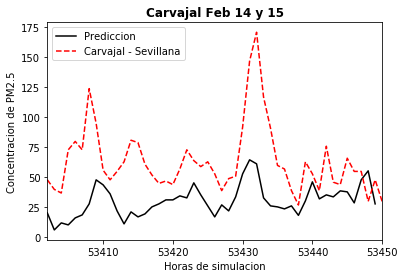

In [11]:
x = pd.DataFrame(np.column_stack((ax,x_test)))
scaler = StandardScaler().fit(x)
x = scaler.transform(x)

test = model.predict(x, batch_size=24)

plot(data.loc[53402:53449].index,test,label='Prediccion', color = 'black')
data[' Carvajal - Sevillana '].loc[53402:53450].plot(ls="--",color = 'r', label='Carvajal - Sevillana')
plt.title('Carvajal Feb 14 y 15', fontweight = 'bold')
plt.ylabel('Concentracion de PM2.5')
plt.xlabel('Horas de simulacion')
plt.legend(loc = 'best')

In [5]:
import skill_metrics as sm

real = data[' Carvajal - Sevillana '].loc[53402:53449].astype(np.float32).values
test1 = np.transpose(test)
print(np.corrcoef(real,test1))
print(sm.rmsd(test1[0],real))
print(sm.bias(test1[0],real))

[[1.         0.41145645]
 [0.41145645 1.        ]]
42.31596182293391
-33.669716


In [6]:
soda = {'NN_carva':test.tolist()}
df = pd.DataFrame(soda, columns = ['NN_carva'])
df.to_csv('carvajal_Feb.csv')

# Carvajal Noviembre
20 - 21 [51578:51625]    
22 - 23 [51626:51673]

In [7]:
x_test = data.loc[51578:51625,[' Puente Aranda ',' Las Ferias ',' San Cristobal ',' Kennedy  ',' Usaquen ',' MinAmbiente ',' Suba     ',' Carvajal - Sevillana ']].astype(np.float32).values
ax = np.arange(51626,51674)

Text(0.5,0,'Horas de simulacion')

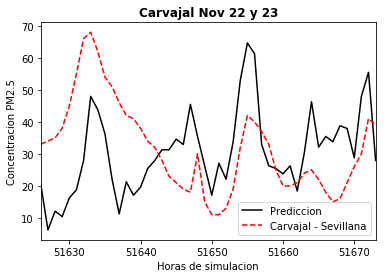

In [12]:
x = pd.DataFrame(np.column_stack((ax,x_test)))
scaler = StandardScaler().fit(x)
x = scaler.transform(x)
test = model.predict(x, batch_size=24)
plot(data.loc[51626:51673].index,test,label='Prediccion', color = 'black')
data[' Carvajal - Sevillana '].loc[51626:51673].plot(ls="--",color = 'r', label='Carvajal - Sevillana')
plt.legend(loc = 'best')
plt.title('Carvajal Nov 22 y 23', fontweight = 'bold')
plt.ylabel('Concentracion PM2.5')
plt.xlabel('Horas de simulacion')

In [9]:
real = data[' Carvajal - Sevillana '].loc[51626:51673].astype(np.float32).values
test1 = np.transpose(test)
print(np.corrcoef(real,test1))
print(sm.rmsd(test1[0],real))
print(sm.bias(test1[0],real))

[[ 1.         -0.28769911]
 [-0.28769911  1.        ]]
21.68540230609253
-1.254303


In [10]:
soda = {'NN_carva':test.tolist()}
df = pd.DataFrame(soda, columns = ['NN_carva'])
df.to_csv('carvajal_Nov.csv')

# Suba Febrero
12 - 13 [53354:53401]             
14 - 15 [53402:53449]

In [14]:
model_Suba = load_model('Model_Suba.h5')
model_Suba.load_weights('Pesos_Suba.h5')
model_Suba.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 200)               2000      
_________________________________________________________________
dense_2 (Dense)              (None, 100)               20100     
_________________________________________________________________
dense_3 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 51        
Total params: 27,201
Trainable params: 27,201
Non-trainable params: 0
_________________________________________________________________


In [15]:
x_test = data.loc[53354:53401,[' Puente Aranda ',' Las Ferias ',' San Cristobal ',' Kennedy  ',' Usaquen ',' MinAmbiente ',' Suba     ',' Carvajal - Sevillana ']].astype(np.float32).values
ax = np.arange(53402,53450)

Text(0.5,0,'Horas de simulacion')

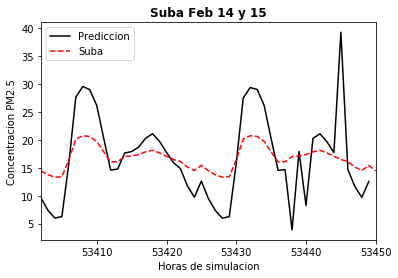

In [16]:
x = pd.DataFrame(np.column_stack((ax,x_test)))
scaler = StandardScaler().fit(x)
x = scaler.transform(x)

test = model_Suba.predict(x, batch_size=24)

plot(data.loc[53402:53449].index,test,label='Prediccion', color = 'black')
data[' Suba     '].loc[53402:53450].plot(ls="--",color = 'r', label='Suba')
plt.legend(loc = 'best')
plt.title('Suba Feb 14 y 15', fontweight = 'bold')
plt.ylabel('Concentracion PM2.5')
plt.xlabel('Horas de simulacion')

In [14]:
real = data[' Suba     '].loc[53402:53449].astype(np.float32).values
test1 = np.transpose(test)
print(np.corrcoef(real,test1))
print(sm.rmsd(test1[0],real))
print(sm.bias(test1[0],real))

[[1.         0.83859638]
 [0.83859638 1.        ]]
6.050811091087379
0.06563568


In [15]:
soda = {'NN_suba':test.tolist()}
df = pd.DataFrame(soda, columns = ['NN_suba'])
df.to_csv('suba_Feb.csv')

# Suba Noviembre
20 - 21 [51578:51625]    
22 - 23 [51626:51673]

In [16]:
x_test = data.loc[51578:51625,[' Puente Aranda ',' Las Ferias ',' San Cristobal ',' Kennedy  ',' Usaquen ',' MinAmbiente ',' Suba     ',' Carvajal - Sevillana ']].astype(np.float32).values
ax = np.arange(51626,51674)

Text(0.5,0,'Horas de simulacion')

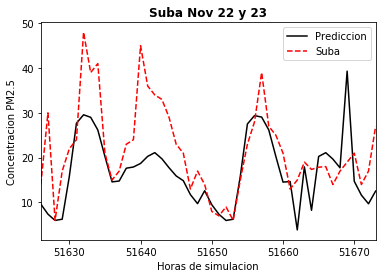

In [17]:
x = pd.DataFrame(np.column_stack((ax,x_test)))
scaler = StandardScaler().fit(x)
x = scaler.transform(x)
test = model_Suba.predict(x, batch_size=24)
plot(data.loc[51626:51673].index,test,label='Prediccion', color = 'black')
data[' Suba     '].loc[51626:51673].plot(ls="--",color = 'r', label='Suba')
plt.legend(loc = 'best')
plt.title('Suba Nov 22 y 23', fontweight = 'bold')
plt.ylabel('Concentracion PM2.5')
plt.xlabel('Horas de simulacion')

In [18]:
real = data[' Suba     '].loc[51626:51673].astype(np.float32).values
test1 = np.transpose(test)
print(np.corrcoef(real,test1))
print(sm.rmsd(test1[0],real))
print(sm.bias(test1[0],real))

[[1.         0.43845406]
 [0.43845406 1.        ]]
10.478586796414868
-4.6732063


In [19]:
soda = {'NN_suba':test.tolist()}
df = pd.DataFrame(soda, columns = ['NN_suba'])
df.to_csv('suba_Nov.csv')

# Usaquen Febrero
12 - 13 [53354:53401]     
14 - 15 [53402:53449]

In [20]:
model_Usa = load_model('Model_Usa.h5')
model_Usa.load_weights('Pesos_Usa.h5')
model_Usa.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 200)               2000      
_________________________________________________________________
dense_2 (Dense)              (None, 100)               20100     
_________________________________________________________________
dense_3 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 51        
Total params: 27,201
Trainable params: 27,201
Non-trainable params: 0
_________________________________________________________________


In [21]:
x_test = data.loc[53354:53401,[' Puente Aranda ',' Las Ferias ',' San Cristobal ',' Kennedy  ',' Usaquen ',' MinAmbiente ',' Suba     ',' Carvajal - Sevillana ']].astype(np.float32).values
ax = np.arange(53402,53450)

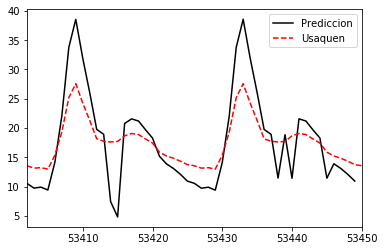

In [22]:
x = pd.DataFrame(np.column_stack((ax,x_test)))
scaler = StandardScaler().fit(x)
x = scaler.transform(x)

test = model_Usa.predict(x, batch_size=24)

plot(data.loc[53402:53449].index,test,label='Prediccion', color = 'black')
data[' Usaquen '].loc[53402:53450].plot(ls="--",color = 'r', label='Usaquen')
plt.legend(loc = 'best')

In [23]:
real = data[' Usaquen '].loc[53402:53449].astype(np.float32).values
test1 = np.transpose(test)
print(np.corrcoef(real,test1))
print(sm.rmsd(test1[0],real))
print(sm.bias(test1[0],real))

[[1.        0.9296225]
 [0.9296225 1.       ]]
4.822883798090393
0.11709595


In [24]:
soda = {'NN_usa':test.tolist()}
df = pd.DataFrame(soda, columns = ['NN_usa'])
df.to_csv('usa_Feb.csv')

# Usaquen Noviembre
20 - 21 [51578:51625]    
22 - 23 [51626:51673]

In [25]:
x_test = data.loc[51578:51625,[' Puente Aranda ',' Las Ferias ',' San Cristobal ',' Kennedy  ',' Usaquen ',' MinAmbiente ',' Suba     ',' Carvajal - Sevillana ']].astype(np.float32).values
ax = np.arange(51626,51674)

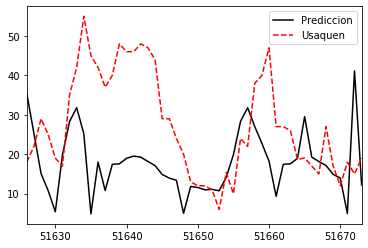

In [26]:
x = pd.DataFrame(np.column_stack((ax,x_test)))
scaler = StandardScaler().fit(x)
x = scaler.transform(x)
test = model_Usa.predict(x, batch_size=24)
plot(data.loc[51626:51673].index,test,label='Prediccion', color = 'black')
data[' Usaquen '].loc[51626:51673].plot(ls="--",color = 'r', label='Usaquen')
plt.legend(loc = 'best')

In [27]:
real = data[' Usaquen '].loc[51626:51673].astype(np.float32).values
test1 = np.transpose(test)
print(np.corrcoef(real,test1))
print(sm.rmsd(test1[0],real))
print(sm.bias(test1[0],real))

[[1.         0.14575685]
 [0.14575685 1.        ]]
17.025843106762547
-9.507454


In [28]:
soda = {'NN_usa':test.tolist()}
df = pd.DataFrame(soda, columns = ['NN_usa'])
df.to_csv('usa_Nov.csv')

# Kennedy Febrero
12 - 13 [53354:53401]     
14 - 15 [53402:53449]

In [29]:
model_Ken = load_model('Model_Ken.h5')
model_Ken.load_weights('Pesos_Ken.h5')
model_Ken.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 200)               2000      
_________________________________________________________________
dense_2 (Dense)              (None, 100)               20100     
_________________________________________________________________
dense_3 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 51        
Total params: 27,201
Trainable params: 27,201
Non-trainable params: 0
_________________________________________________________________


In [30]:
x_test = data.loc[53354:53401,[' Puente Aranda ',' Las Ferias ',' San Cristobal ',' Kennedy  ',' Usaquen ',' MinAmbiente ',' Suba     ',' Carvajal - Sevillana ']].astype(np.float32).values
ax = np.arange(53402,53450)

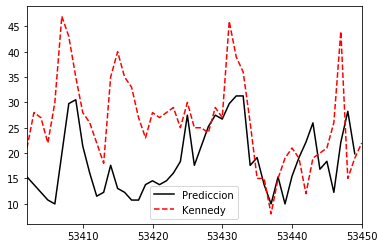

In [31]:
x = pd.DataFrame(np.column_stack((ax,x_test)))
scaler = StandardScaler().fit(x)
x = scaler.transform(x)

test = model_Ken.predict(x, batch_size=24)

plot(data.loc[53402:53449].index,test,label='Prediccion', color = 'black')
data[' Kennedy  '].loc[53402:53450].plot(ls="--",color = 'r', label='Kennedy')
plt.legend(loc = 'best')

In [32]:
real = data[' Kennedy  '].loc[53402:53449].astype(np.float32).values
test1 = np.transpose(test)
print(np.corrcoef(real,test1))
print(sm.rmsd(test1[0],real))
print(sm.bias(test1[0],real))

[[1.         0.34269773]
 [0.34269773 1.        ]]
12.05855220305174
-8.102385


In [33]:
soda = {'NN_ken':test.tolist()}
df = pd.DataFrame(soda, columns = ['NN_ken'])
df.to_csv('ken_Feb.csv')

# Kennedy Noviembre
20 - 21 [51578:51625]    
22 - 23 [51626:51673]

In [34]:
x_test = data.loc[51578:51625,[' Puente Aranda ',' Las Ferias ',' San Cristobal ',' Kennedy  ',' Usaquen ',' MinAmbiente ',' Suba     ',' Carvajal - Sevillana ']].astype(np.float32).values
ax = np.arange(51626,51674)

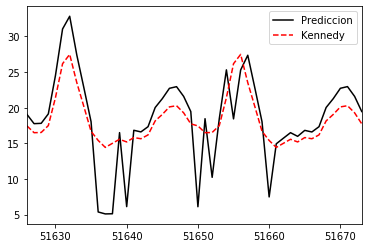

In [35]:
x = pd.DataFrame(np.column_stack((ax,x_test)))
scaler = StandardScaler().fit(x)
x = scaler.transform(x)
test = model_Ken.predict(x, batch_size=24)
plot(data.loc[51626:51673].index,test,label='Prediccion', color = 'black')
data[' Kennedy  '].loc[51626:51673].plot(ls="--",color = 'r', label='Kennedy')
plt.legend(loc = 'best')

In [36]:
real = data[' Kennedy  '].loc[53402:53449].astype(np.float32).values
test1 = np.transpose(test)
print(np.corrcoef(real,test1))
print(sm.rmsd(test1[0],real))
print(sm.bias(test1[0],real))

[[1.         0.39954511]
 [0.39954511 1.        ]]
11.684476355900102
-8.017103


In [37]:
soda = {'NN_ken':test.tolist()}
df = pd.DataFrame(soda, columns = ['NN_ken'])
df.to_csv('ken_Nov.csv')

# Puente Aranda Febrero
12 - 13 [53354:53401]     
14 - 15 [53402:53449]

In [38]:
model_Puen = load_model('Model_Puen.h5')
model_Puen.load_weights('Pesos_Puen.h5')
model_Puen.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 200)               2000      
_________________________________________________________________
dense_2 (Dense)              (None, 100)               20100     
_________________________________________________________________
dense_3 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 51        
Total params: 27,201
Trainable params: 27,201
Non-trainable params: 0
_________________________________________________________________


In [39]:
x_test = data.loc[53354:53401,[' Puente Aranda ',' Las Ferias ',' San Cristobal ',' Kennedy  ',' Usaquen ',' MinAmbiente ',' Suba     ',' Carvajal - Sevillana ']].astype(np.float32).values
ax = np.arange(53402,53450)

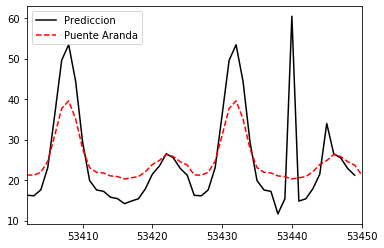

In [40]:
x = pd.DataFrame(np.column_stack((ax,x_test)))
scaler = StandardScaler().fit(x)
x = scaler.transform(x)

test = model_Puen.predict(x, batch_size=24)

plot(data.loc[53402:53449].index,test,label='Prediccion', color = 'black')
data[' Puente Aranda '].loc[53402:53450].plot(ls="--",color = 'r', label='Puente Aranda')
plt.legend(loc = 'best')

In [41]:
real = data[' Puente Aranda '].loc[53402:53449].astype(np.float32).values
test1 = np.transpose(test)
print(np.corrcoef(real,test1))
print(sm.rmsd(test1[0],real))
print(sm.bias(test1[0],real))

[[1.         0.83090638]
 [0.83090638 1.        ]]
8.228724935401596
-0.010923386


In [42]:
soda = {'NN_puen':test.tolist()}
df = pd.DataFrame(soda, columns = ['NN_puen'])
df.to_csv('puen_Feb.csv')

# Puente Aranda Noviembre
20 - 21 [51578:51625]    
22 - 23 [51626:51673]

In [43]:
x_test = data.loc[51578:51625,[' Puente Aranda ',' Las Ferias ',' San Cristobal ',' Kennedy  ',' Usaquen ',' MinAmbiente ',' Suba     ',' Carvajal - Sevillana ']].astype(np.float32).values
ax = np.arange(51626,51674)

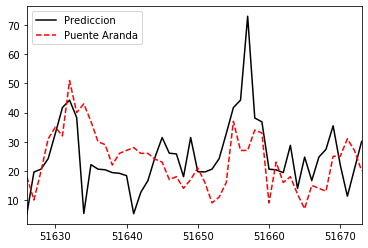

In [44]:
x = pd.DataFrame(np.column_stack((ax,x_test)))
scaler = StandardScaler().fit(x)
x = scaler.transform(x)
test = model_Puen.predict(x, batch_size=24)
plot(data.loc[51626:51673].index,test,label='Prediccion', color = 'black')
data[' Puente Aranda '].loc[51626:51673].plot(ls="--",color = 'r', label='Puente Aranda')
plt.legend(loc = 'best')

In [45]:
real = data[' Puente Aranda '].loc[53402:53449].astype(np.float32).values
test1 = np.transpose(test)
print(np.corrcoef(real,test1))
print(sm.rmsd(test1[0],real))
print(sm.bias(test1[0],real))

[[1.         0.72466604]
 [0.72466604 1.        ]]
8.72566661601738
0.17487907


In [46]:
soda = {'NN_puen':test.tolist()}
df = pd.DataFrame(soda, columns = ['NN_puen'])
df.to_csv('puen_Nov.csv')

# Tunal Febrero
12 - 13 [53354:53401]     
14 - 15 [53402:53449]

In [47]:
model_Tun = load_model('Model_Tun.h5')
model_Tun.load_weights('Pesos_Tun.h5')
model_Tun.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 200)               2000      
_________________________________________________________________
dense_2 (Dense)              (None, 100)               20100     
_________________________________________________________________
dense_3 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 51        
Total params: 27,201
Trainable params: 27,201
Non-trainable params: 0
_________________________________________________________________


In [48]:
x_test = data.loc[53354:53401,[' Tunal    ',' Las Ferias ',' San Cristobal ',' Kennedy  ',' Usaquen ',' MinAmbiente ',' Suba     ',' Carvajal - Sevillana ']].astype(np.float32).values
ax = np.arange(53402,53450)

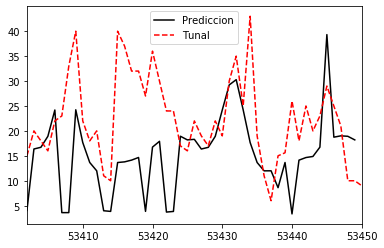

In [49]:
x = pd.DataFrame(np.column_stack((ax,x_test)))
scaler = StandardScaler().fit(x)
x = scaler.transform(x)

test = model_Tun.predict(x, batch_size=24)

plot(data.loc[53402:53449].index,test,label='Prediccion', color = 'black')
data[' Tunal    '].loc[53402:53450].plot(ls="--",color = 'r', label='Tunal')
plt.legend(loc = 'best')

In [50]:
real = data[' Tunal    '].loc[53402:53449].astype(np.float32).values
test1 = np.transpose(test)
print(np.corrcoef(real,test1))
print(sm.rmsd(test1[0],real))
print(sm.bias(test1[0],real))

[[1.        0.2344687]
 [0.2344687 1.       ]]
12.404286060179377
-7.3459597


In [51]:
soda = {'NN_tun':test.tolist()}
df = pd.DataFrame(soda, columns = ['NN_tun'])
df.to_csv('tun_Feb.csv')

# Tunal Noviembre
20 - 21 [51578:51625]    
22 - 23 [51626:51673]

In [52]:
x_test = data.loc[53354:53401,[' Tunal    ',' Las Ferias ',' San Cristobal ',' Kennedy  ',' Usaquen ',' MinAmbiente ',' Suba     ',' Carvajal - Sevillana ']].astype(np.float32).values
ax = np.arange(53402,53450)

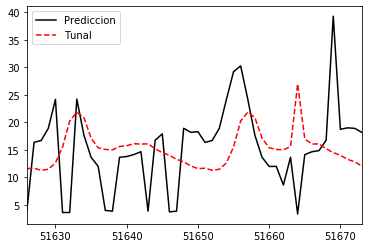

In [53]:
x = pd.DataFrame(np.column_stack((ax,x_test)))
scaler = StandardScaler().fit(x)
x = scaler.transform(x)
test = model_Tun.predict(x, batch_size=24)
plot(data.loc[51626:51673].index,test,label='Prediccion', color = 'black')
data[' Tunal    '].loc[51626:51673].plot(ls="--",color = 'r', label='Tunal')
plt.legend(loc = 'best')

In [54]:
real = data[' Tunal    '].loc[53402:53449].astype(np.float32).values
test1 = np.transpose(test)
print(np.corrcoef(real,test1))
print(sm.rmsd(test1[0],real))
print(sm.bias(test1[0],real))

[[1.        0.2344687]
 [0.2344687 1.       ]]
12.404286060179377
-7.3459597


In [55]:
soda = {'NN_tun':test.tolist()}
df = pd.DataFrame(soda, columns = ['NN_tun'])
df.to_csv('tun_Nov.csv')

# Centro Febrero
12 - 13 [53354:53401]     
14 - 15 [53402:53449]

In [56]:
model_Cen = load_model('Model_Cen.h5')
model_Cen.load_weights('Pesos_Cen.h5')
model_Cen.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 200)               2000      
_________________________________________________________________
dense_6 (Dense)              (None, 100)               20100     
_________________________________________________________________
dense_7 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 51        
Total params: 27,201
Trainable params: 27,201
Non-trainable params: 0
_________________________________________________________________


In [57]:
x_test = data.loc[53354:53401,[' Centro de Alto Rendimiento ',' Las Ferias ',' San Cristobal ',' Kennedy  ',' Usaquen ',' MinAmbiente ',' Suba     ',' Carvajal - Sevillana ']].astype(np.float32).values
ax = np.arange(53402,53450)

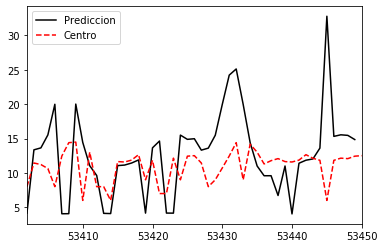

In [58]:
x = pd.DataFrame(np.column_stack((ax,x_test)))
scaler = StandardScaler().fit(x)
x = scaler.transform(x)

test = model_Cen.predict(x, batch_size=24)

plot(data.loc[53402:53449].index,test,label='Prediccion', color = 'black')
data[' Centro de Alto Rendimiento '].loc[53402:53450].plot(ls="--",color = 'r', label='Centro')
plt.legend(loc = 'best')

In [59]:
real = data[' Centro de Alto Rendimiento '].loc[53402:53449].astype(np.float32).values
test1 = np.transpose(test)
print(np.corrcoef(real,test1))
print(sm.rmsd(test1[0],real))
print(sm.bias(test1[0],real))

[[1.         0.01950869]
 [0.01950869 1.        ]]
6.6222351830773105
1.806015


# Centro Noviembre
20 - 21 [51578:51625]    
22 - 23 [51626:51673]

In [60]:
x_test = data.loc[53354:53401,[' Centro de Alto Rendimiento ',' Las Ferias ',' San Cristobal ',' Kennedy  ',' Usaquen ',' MinAmbiente ',' Suba     ',' Carvajal - Sevillana ']].astype(np.float32).values
ax = np.arange(53402,53450)

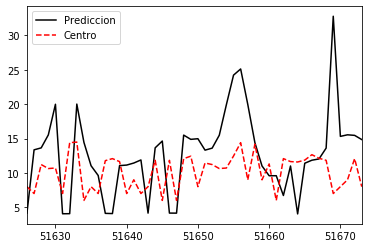

In [61]:
x = pd.DataFrame(np.column_stack((ax,x_test)))
scaler = StandardScaler().fit(x)
x = scaler.transform(x)
test = model_Cen.predict(x, batch_size=24)
plot(data.loc[51626:51673].index,test,label='Prediccion', color = 'black')
data[' Centro de Alto Rendimiento '].loc[51626:51673].plot(ls="--",color = 'r', label='Centro')
plt.legend(loc = 'best')

In [62]:
real = data[' Centro de Alto Rendimiento '].loc[53402:53449].astype(np.float32).values
test1 = np.transpose(test)
print(np.corrcoef(real,test1))
print(sm.rmsd(test1[0],real))
print(sm.bias(test1[0],real))

[[1.         0.01950869]
 [0.01950869 1.        ]]
6.6222351830773105
1.806015
